1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [13]:
import numpy as np

salaries = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scores = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

avg_salaries = np.mean(salaries)
avg_scores = np.mean(scores)


# With intercept
b = (np.mean(salaries * scores) - avg_salaries * avg_scores) / (np.mean(salaries ** 2) - avg_salaries ** 2)
a = avg_score - b * avg_salaries

# Without intercept
B = np.mean(salaries * scores) / np.mean(salaries ** 2)

print('Уравнение линии регрессии с intercept: y = {} + {}*X'.format(a, b))
print('Уравнение линии регрессии без intercept: y = {}*X'.format(B))

Уравнение линии регрессии с intercept: y = 444.1773573243596 + 2.620538882402765*X
Уравнение линии регрессии без intercept: y = 5.889820420132688*X


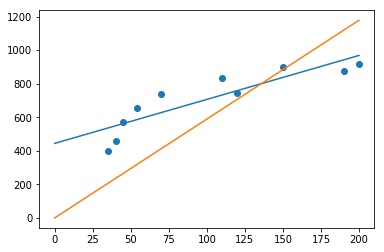

In [15]:
import matplotlib.pyplot as plt

X = np.linspace(0,200, 100)
y = a + b * X
y_2 = B * X

plt.scatter(salaries, scores)
plt.plot(X, y)
plt.plot(X, y_2)

2. Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [24]:
B1 = 0.1
alpha = 1e-6
n = len(scores)

def mse(B, scores=scores, salaries=salaries, n=10):
    return np.sum((B*salaries - scores) ** 2) / n

for i in range(1000):
    B1 -= alpha * (2/n) * np.sum((B1 * salaries - scores) * salaries)
    if i%100 == 0:
        print('Итерация: {}, B1: {}, mse: {}.'.format(i, B1, mse(B1)))
    

Итерация: 0, B1: 0.25952808, mse: 493237.7212546963.
Итерация: 100, B1: 5.54537842245223, mse: 58151.31823171113.
Итерация: 200, B1: 5.868748638669329, mse: 56522.97550129376.
Итерация: 300, B1: 5.888531320728348, mse: 56516.88130936019.
Итерация: 400, B1: 5.8897415574471985, mse: 56516.85850140053.
Итерация: 500, B1: 5.889815595583751, mse: 56516.858416040064.
Итерация: 600, B1: 5.889820124983314, mse: 56516.85841572062.
Итерация: 700, B1: 5.889820402076462, mse: 56516.85841571941.
Итерация: 800, B1: 5.88982041902807, mse: 56516.8584157194.
Итерация: 900, B1: 5.889820420065112, mse: 56516.85841571941.


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Лапласса - когда есть данные о дисперсии (или стандартном отклонении) генеральной совокупности, Стьюдента - когда этих данных нет.

4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [32]:
# НЕ УСПЕЛ ((